In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

In [105]:
df = pd.read_csv("50_Startups.csv")
print("Shape:", df.shape)
print("------")
print(df.info())
print("------")
print(df.describe())
print("------")
print(df.head())

Shape: (50, 5)
------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
------
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    

In [106]:
print(df.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [107]:
# # Numerical Analysis

# # On prep_time and cook_time:

# # Calculate minimum

# # Maximum

# # Mean

# # Median

# # Standard deviation


# print("R&D Spend Statistics :")
# print(f"Minimum R&D Spend: {df['R&D Spend'].min()}")
# print(f"Maximum R&D Spend: {df['R&D Spend'].max()}")
# print(f"Mean R&D Spend: {df['R&D Spend'].mean()}")
# print(f"Median R&D Spend: {df['R&D Spend'].median()}")
# print(f"Standard Deviation of R&D Spend: {df['R&D Spend'].std()}")
# print("\nAdministration Statistics : ")


# print(f"Minimum Administration: {df['Administration'].min()}")
# print(f"Maximum Administration: {df['Administration'].max()}")
# print(f"Mean Administration: {df['Administration'].mean()}")
# print(f"Median Administration: {df['Administration'].median()}")
# print(f"Standard Deviation of Administration: {df['Administration'].std()}")
# print("\nMarketing Spend Statistics : ")
 

# print(f"Minimum Marketing Spend: {df['Marketing Spend'].min()}")
# print(f"Maximum Marketing Spend: {df['Marketing Spend'].max()}")
# print(f"Mean Marketing Spend: {df['Marketing Spend'].mean()}")
# print(f"Median Marketing Spend: {df['Marketing Spend'].median()}")
# print(f"Standard Deviation of Marketing Spend: {df['Marketing Spend'].std()}")
# print("\nCook Time Statistics : ")


# print(f"Minimum Profit: {df['Profit'].min()}")
# print(f"Maximum Profit: {df['Profit'].max()}")
# print(f"Mean Profit: {df['Profit'].mean()}")
# print(f"Median Profit: {df['Profit'].median()}")
# print(f"Standard Deviation of Profit: {df['Profit'].std()}")



In [108]:
x1 = df.columns[df.isnull().any()].tolist()
print(x1)
print(df.isnull().sum())


[]
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


<Axes: >

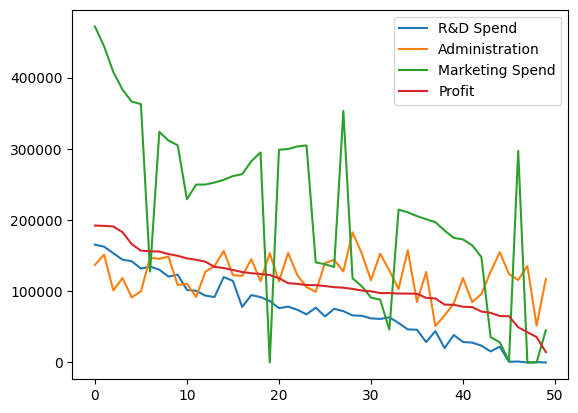

In [109]:
df.plot()

In [110]:
# # ---------- Marketing Spend ----------
# Q1_marketing = df['Marketing Spend'].quantile(0.25)
# Q3_marketing = df['Marketing Spend'].quantile(0.75)
# IQR_marketing = Q3_marketing - Q1_marketing

# lower_marketing = Q1_marketing - 1.5 * IQR_marketing
# upper_marketing = Q3_marketing + 1.5 * IQR_marketing

# outliers_marketing = (df['Marketing Spend'] < lower_marketing) | (df['Marketing Spend'] > upper_marketing)

# print("Marketing Spend Outliers:")
# print(df[outliers_marketing])

# median_marketing = df['Marketing Spend'].median()
# df.loc[outliers_marketing, 'Marketing Spend'] = median_marketing

# print("Marketing Spend Outliers Fixed.")
# print("-------------")

# # ---------- R&D Spend ----------
# Q1_rnd = df['R&D Spend'].quantile(0.25)
# Q3_rnd = df['R&D Spend'].quantile(0.75)
# IQR_rnd = Q3_rnd - Q1_rnd

# lower_rnd = Q1_rnd - 1.5 * IQR_rnd
# upper_rnd = Q3_rnd + 1.5 * IQR_rnd

# outliers_rnd = (df['R&D Spend'] < lower_rnd) | (df['R&D Spend'] > upper_rnd)

# print("R&D Spend Outliers:")
# print(df[outliers_rnd])

# median_rnd = df['R&D Spend'].median()
# df.loc[outliers_rnd, 'R&D Spend'] = median_rnd

# print("R&D Spend Outliers Fixed.")
# print("-------------")

# # ---------- Administration ----------
# Q1_admin = df['Administration'].quantile(0.25)
# Q3_admin = df['Administration'].quantile(0.75)
# IQR_admin = Q3_admin - Q1_admin  # Fixed bug

# lower_admin = Q1_admin - 1.5 * IQR_admin
# upper_admin = Q3_admin + 1.5 * IQR_admin

# outliers_admin = (df['Administration'] < lower_admin) | (df['Administration'] > upper_admin)

# print("Administration Outliers:")
# print(df[outliers_admin])

# median_admin = df['Administration'].median()
# df.loc[outliers_admin, 'Administration'] = median_admin

# print("Administration Outliers Fixed.")
# print("-------------")

# # ---------- Profit ----------
# Q1_profit = df['Profit'].quantile(0.25)
# Q3_profit = df['Profit'].quantile(0.75)
# IQR_profit = Q3_profit - Q1_profit

# lower_profit = Q1_profit - 1.5 * IQR_profit
# upper_profit = Q3_profit + 1.5 * IQR_profit

# outliers_profit = (df['Profit'] < lower_profit) | (df['Profit'] > upper_profit)

# print("Profit Outliers:")
# print(df[outliers_profit])

# median_profit = df['Profit'].median()
# df.loc[outliers_profit, 'Profit'] = median_profit

# print("Profit Outliers Fixed.")
# print("-------------")


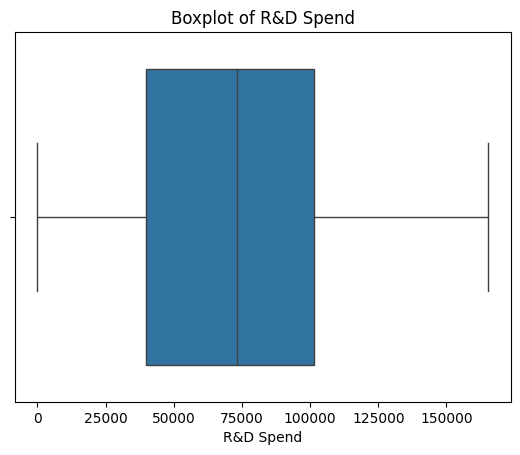

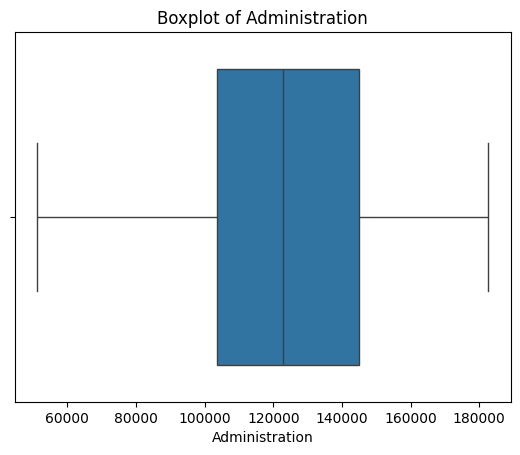

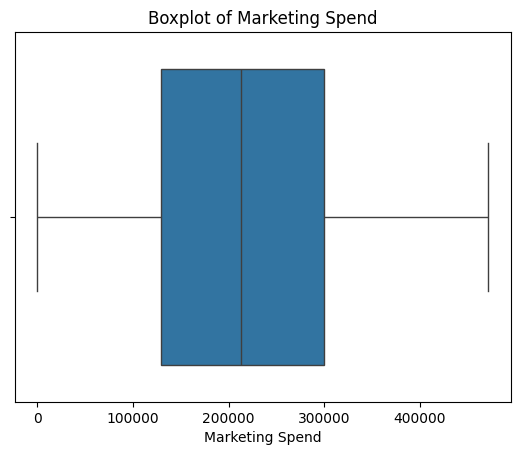

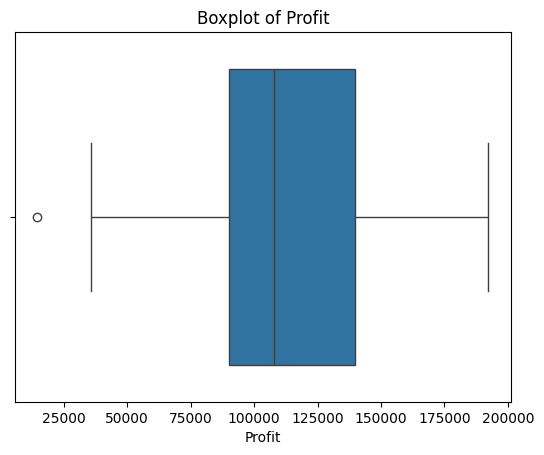

In [111]:
numeric_features = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
for col in numeric_features:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")


In [112]:
print(df[numeric_features].skew())

R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64


In [113]:
df_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)
print(df_encoded.head())

   R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
0  165349.20       136897.80        471784.10  192261.83          False   
1  162597.70       151377.59        443898.53  191792.06          False   
2  153441.51       101145.55        407934.54  191050.39           True   
3  144372.41       118671.85        383199.62  182901.99          False   
4  142107.34        91391.77        366168.42  166187.94           True   

   State_New York  
0            True  
1           False  
2           False  
3            True  
4           False  


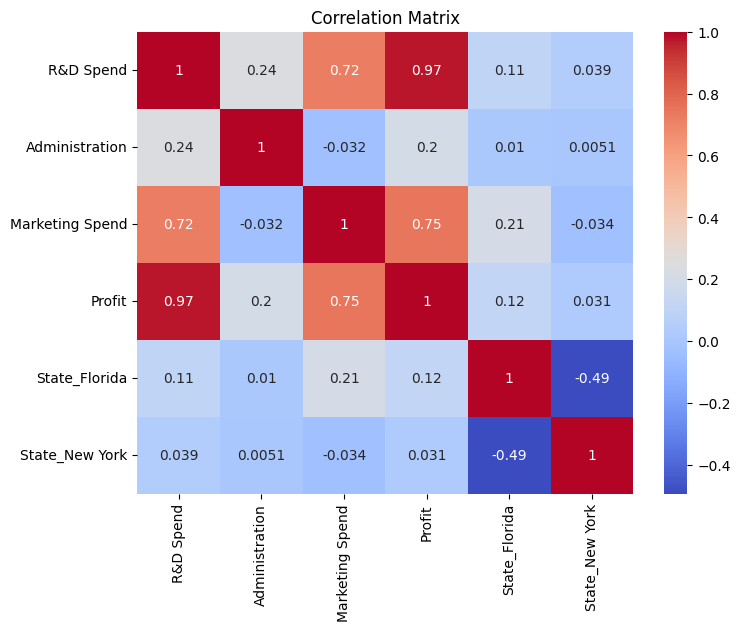

In [114]:
corr = df_encoded.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

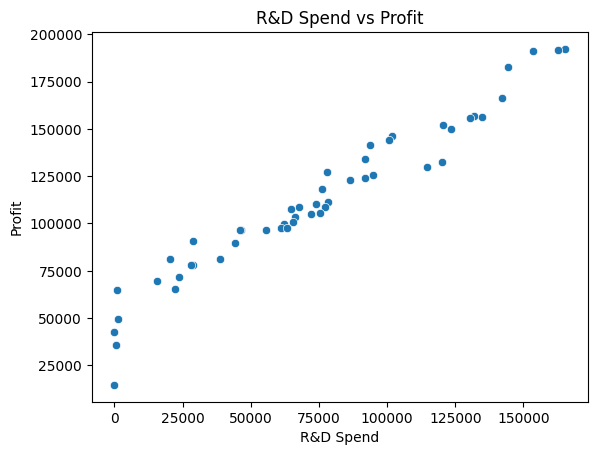

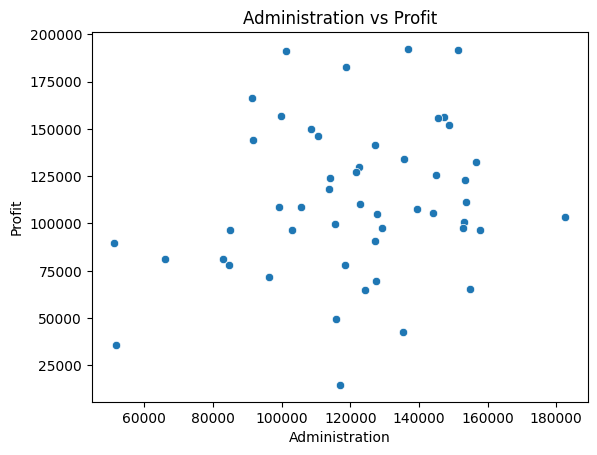

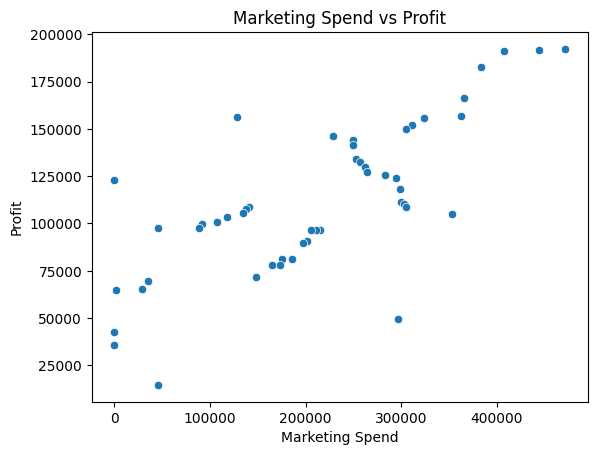

In [115]:
for col in ['R&D Spend', 'Administration', 'Marketing Spend']:
    sns.scatterplot(x=df[col], y=df['Profit'])
    plt.title(f"{col} vs Profit")
    plt.show()

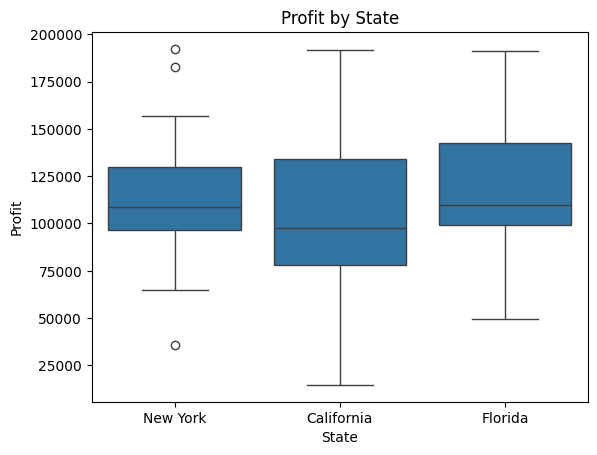

In [116]:
sns.boxplot(x=df['State'], y=df['Profit'])
plt.title("Profit by State")
plt.show()

In [117]:
df_encoded['Total Spend'] = df_encoded['R&D Spend'] + df_encoded['Administration'] + df_encoded['Marketing Spend']
df_encoded['R&D Ratio'] = df_encoded['R&D Spend'] / df_encoded['Total Spend']
df_encoded['Marketing Ratio'] = df_encoded['Marketing Spend'] / df_encoded['Total Spend']


In [118]:
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

# Train-test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (optional but recommended for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PHASE 6 — Train Linear Regression Models

# Baseline Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print("Baseline Linear Regression Metrics:")
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


Baseline Linear Regression Metrics:
R2 Score: 0.920663091763033
RMSE: 10565.37307684495
MAE: 8773.679894517665


In [119]:
# Coefficients
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
print(coeff_df.sort_values(by='Coefficient', key=abs, ascending=False))

# Regularized Models
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

print("\nRidge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)


           Feature   Coefficient
0        R&D Spend  19369.890672
6        R&D Ratio  11219.953019
5      Total Spend   9565.444615
2  Marketing Spend   5724.742445
1   Administration  -3921.113615
7  Marketing Ratio  -3623.713151
4   State_New York  -1659.752817
3    State_Florida   -552.799200

Ridge Coefficients: [16971.80006057 -3440.91370857  6661.08327859  -668.17454027
 -1672.92223039  9615.86759167 12449.58737702 -3446.10828455]
Lasso Coefficients: [23069.48152227 -1911.78191248 14821.70939598  -552.59311275
 -1659.49625409 -2546.89678259 11219.69553759 -3623.50391039]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.361e+08, tolerance: 5.843e+06
  model = cd_fast.enet_coordinate_descent(


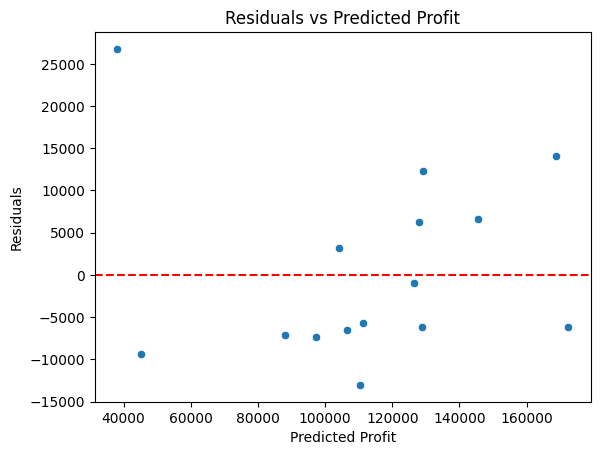

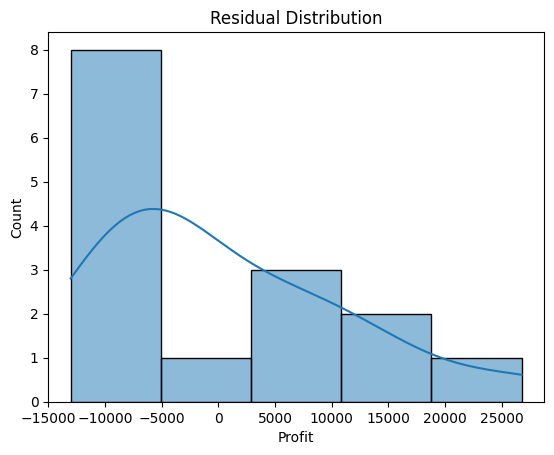

In [120]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Profit")
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

In [121]:
coeff_df_sorted = coeff_df.reindex(coeff_df['Coefficient'].abs().sort_values(ascending=False).index)
print("Feature importance:\n", coeff_df_sorted)

Feature importance:
            Feature   Coefficient
0        R&D Spend  19369.890672
6        R&D Ratio  11219.953019
5      Total Spend   9565.444615
2  Marketing Spend   5724.742445
1   Administration  -3921.113615
7  Marketing Ratio  -3623.713151
4   State_New York  -1659.752817
3    State_Florida   -552.799200
